Para esta guia es importante ver el notebook y el video de clases, los ejercicios son extraidos de ahi
se reciere el modulo analisis tecnico que esta en drive del curso 
si llegaran a tener inconvenientes para cargar el archivo utilizar la siguiente definicion del metodo (en la siguiente celda).


Visitar y revisar esta pagina.
https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.figure.html

In [47]:
def getDataYahoo(ticker):
    import yfinance as yf
    data = yf.download('AAPL')
    return data.rename(columns={'Adj Close':'AdjClose'})

In [3]:
def getDataExcel(ticker):
    '''
    Busca excel de datos y devuelve DF las columnas: 'Open','High','Low','Close','AdjClose','Volume' y 'pctChange'
    |    
    |_ ticker:  El ticker a buscar
    '''
    import pandas as pd
    try:
        data = pd.read_excel('excels_csvs/'+ticker+'.xlsx').set_index('timestamp').sort_index()
        data.columns = ['Open','High','Low','Close','AdjClose','Volume']
        data['pctChange'] = data.AdjClose.pct_change()
    except:
        try:
            data = pd.read_excel('excels_csvs/ADRs/'+ticker+'.xlsx').set_index('timestamp').sort_index()
            data.columns = ['Open','High','Low','Close','AdjClose','Volume']
            data['pctChange'] = data.AdjClose.pct_change()
        except:
            data = 'No encontre el archivo'
    return data


#### Ejercicio 1)
    -Escribir y ejecutar plt.plot(data.AdjClose) sobre un data obtenido por medio del getDataExcel
    ¿Que clase de grafico es?
    -Hacer lo mismo con el open en otro grafico
    -Agregarle como titulo el ticker cuyo valor muestra.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


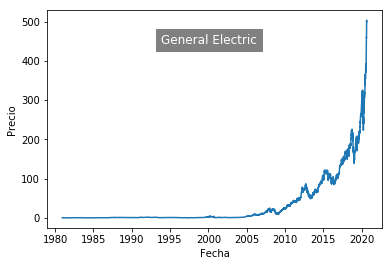

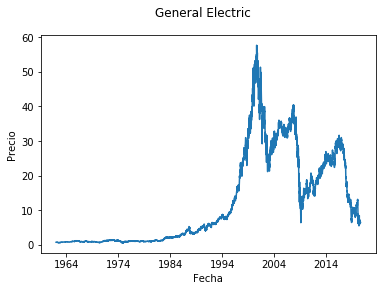

In [48]:

##Respuesta, lo hago con yfinance para que cuando lo corran lo puedan ver funcionando por si tuvieron inconvenientes con el 
##getDataExcel()
#1)
import matplotlib.pyplot as plt

data = getDataYahoo("GE")
plt.figure().suptitle('General Electric', y= 0.8, color='white', backgroundcolor='gray')
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.plot(data.index, data.AdjClose)

## dibujo 2 
data = yf.download("GE").copy()
plt.figure().suptitle('General Electric')
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.plot(data.index, data["Close"])




In [4]:
#Tipo de grafico, grafico de series, ejes x e y
help(plt.plot )

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the  appearance. Line properties and *fmt* can be mixed.
    The following two calls yield identical resu

#### Ejercicio 2)
    -Escribir y ejecutar plt.plot(data.AdjClose) sobre un data obtenido por medio del getDataExcel()
    -Agregarle titulos a los ejes, al grafico y poner alguna anotacion que consideren pertinente.

[*********************100%***********************]  1 of 1 completed


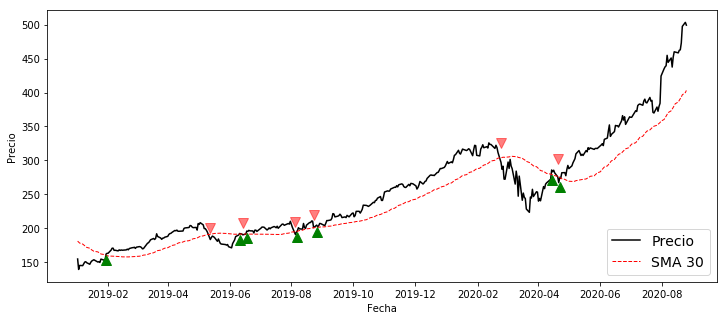

In [49]:
import datetime as dt

data = getDataYahoo('AAPL')

##Aca hago eso para crear la columna AdjClose, es solo una forma
data['SMA'] = data.AdjClose.rolling(50).mean()
data = data.loc[data.index>"2019"]

# Armamos la señal a graficar
##En CrucePos se pone True si el cierre es mayor a la sma y a la ver el cierre de ayer es menor a la sma
data['CrucePos'] = (data.AdjClose > data.SMA) & (data.AdjClose.shift() < data.SMA.shift())
dataPos = (data.AdjClose*0.95).loc[data.CrucePos==True]


data['CruceNeg'] = (data.AdjClose < data.SMA) & (data.AdjClose.shift() > data.SMA.shift())
dataNeg = (data.AdjClose*1.095).loc[data.CruceNeg==True]

# Graficamos
plt.figure(figsize=(12,5))
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.plot(data.AdjClose, c="k", ls="-", lw=1.5)
plt.plot(data.SMA, c="r", ls="--", lw=1)

plt.legend(["Precio","SMA 30"], loc='lower right', fontsize=14)
plt.plot(dataPos.index, dataPos, "^", markersize=10, c='g')
plt.plot(dataNeg.index, dataNeg, "v", markersize=10, c='r', alpha=0.5)

#### Ejercicio 3)
    -mostrar el gráfico parcial de una serie, de los datos tomados previamente.
    -Cambiar el tamaño del grafico a 12 x 5 
    -Cambiar el grosor y color de la linea a uno que prefieran diferente al que viene por defecto

In [29]:
#punto 1 el de antes lo fracciona cuando hace,  data = data.loc[data.index>"2019"] tener en cuenta que en data se pierde el resto

In [ ]:
#Punto 2 el ej anterior ya esta en esa medida plt.figure(figsize=(12,5)) probar cambiando los valores

In [ ]:
#punto 3 idem plt.plot(data.AdjClose, c="k", ls="-", lw=1.5)
#plt.plot(data.SMA, c="r", ls="--", lw=1)

#### Ejercicio 4)
    -Repetir el grafico del ejercicio anterior y pintar el area bajo la curva.
    -Volver a repetir y ahora solo pintar una parte un intervalo de tiempo pequeño

[*********************100%***********************]  1 of 1 completed


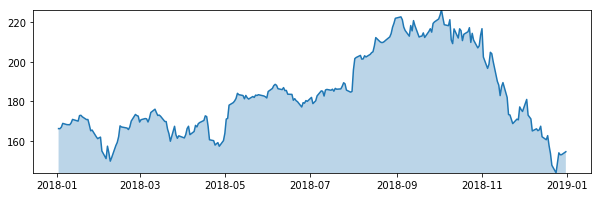

In [50]:
#Punto 1
data = getDataYahoo('AAPL')

precios2018 = data.AdjClose.loc[(data.index>='2018') & (data.index<'2019')]

plt.figure(figsize=(10,3))
plt.plot(precios2018)

axes = plt.gca()
axes.set_ylim([precios2018.min(),precios2018.max()])

plt.fill_between(precios2018.index, precios2018, alpha=0.3)

[*********************100%***********************]  1 of 1 completed


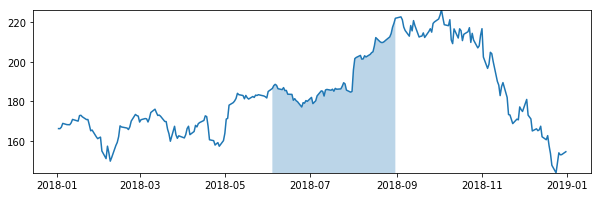

In [51]:
##El punto 2 es casi identico solo que al fill_between le agrego una condicion

#Punto 1
data = yf.download('AAPL')

##Aca hago eso para crear la columna AdjClose, es solo una forma
data["AdjClose"] = data["Adj Close"]

precios2018 = data.AdjClose.loc[(data.index>='2018') & (data.index<'2019')]

plt.figure(figsize=(10,3))
plt.plot(precios2018)

condicion = (precios2018.index>"2018-06-01") & (precios2018.index<"2018-09-01")
axes = plt.gca()
axes.set_ylim([precios2018.min(),precios2018.max()])

plt.fill_between(precios2018.index, precios2018, where=condicion, alpha=0.3)



#### Ejercicio 5)
    -Repetir el grafico del ejercicio anterior y pintar segun el precio actual. que divida los precios por debajo y por encima.
    -Agregar color rojo, al area que esta por debajo y color verde a la que esta por encima.

[*********************100%***********************]  1 of 1 completed


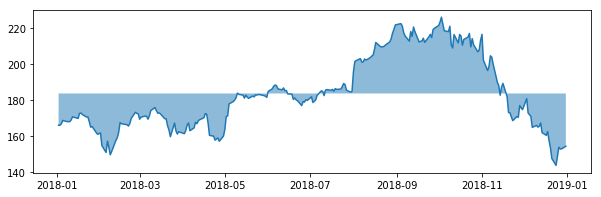

In [52]:
#Punto 1
data = getDataYahoo('AAPL')


precios2018 = data.AdjClose.loc[(data.index>='2018') & (data.index<'2019')]

plt.figure(figsize=(10,3))
plt.plot(precios2018.index, precios2018)

plt.fill_between(precios2018.index, precios2018, precios2018.mean(), alpha=0.5)

[*********************100%***********************]  1 of 1 completed


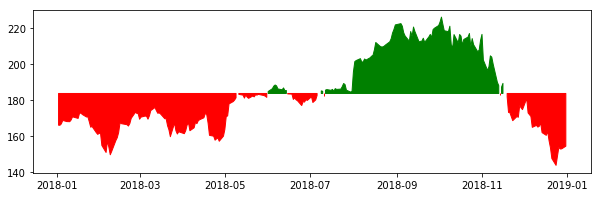

In [53]:
#punto 2
data = getDataYahoo('AAPL')

precios2018 = data.AdjClose.loc[(data.index>='2018') & (data.index<'2019')]

plt.figure(figsize=(10,3))
fechas = precios2018.index
media = precios2018.mean()

cp = (precios2018 >= media)
cn = (precios2018 < media)

plt.fill_between(fechas, precios2018, media, where=cp, color="green")
plt.fill_between(fechas, precios2018, media, where=cn, color="red")

#### Ejercicio 6)
    Agregarle una grilla de fondo al grafico y probar los siquientes atributos con diferentes valores
        -which: major/minor
        -axis: x, y, both
        -color: nombre del color o abreviacion
        -linewidth o lw: el ancho de la linea
        -linestyle o ls: el tipo de linea - para continuo, . para punteado, -. para linea/punto, etc
        -alpha: transparencia

[*********************100%***********************]  1 of 1 completed


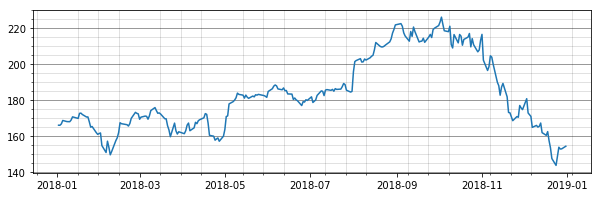

In [54]:
data = getDataYahoo('AAPL')
precios2018 = data.AdjClose.loc[(data.index>='2018') & (data.index<'2019')]

plt.figure(figsize=(10,3))
plt.plot(precios2018)

# El parametro "lw" es lo mismo que "linewidth"
plt.grid(which='major', axis='y', color='black', lw=1, alpha=0.4)

# Habilitamos primero la grilla secundaria
plt.minorticks_on()
plt.grid(which='minor', axis='both', color='black', alpha=0.15)

plt.show()

#### Ejercicio 7)
    -Superposicion de series, se necesita plotear el precio y una media movil exponencial de 21 ruedas, deben tener colores diferentes.
    -Agregarle indicadores, este debe ser un triangulo verde cuando la ema cruza al alza y roja cuando cruza a la baja al precio.

In [ ]:
##punto 1 y 2 Ver ejericio 2, esta resuelto ahi.